# Data preprocessing

## Overview

* remove skewenes of target feature
* remove skewenes of numeric features is exists
* handle missing values in categorical features
* handle missing values in numerical features
* feature selection

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from __future__ import division

%matplotlib inline

sns.set_style("whitegrid")
# sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
#plt.style.use('ggplot')

## Load data

In [83]:
!ls

README.md            examples             preprocessing.ipynb
Untitled.ipynb       model.py             test_of_lambda.ipynb
data                 modelling.ipynb      xgboost_test.ipynb
eda.ipynb            models
ensembling.ipynb     output


In [84]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

## Target variable

In [85]:
target = train['SalePrice']
target_log = np.log1p(train['SalePrice'])

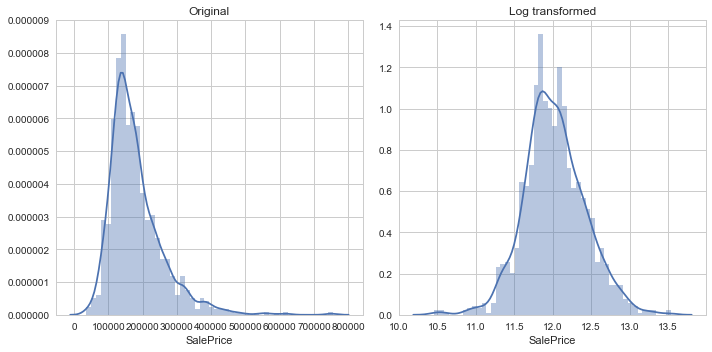

In [86]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.distplot(target, bins=50)
plt.title('Original')

plt.subplot(1,2,2)
sns.distplot(target_log, bins=50)
plt.title('Log transformed')

plt.tight_layout()

## Concat train and test dataset in order for pre-processing

In order to apply transformations on data, we have to concatenate both datasets: train and 

In [87]:
# drop target variable from train dataset
train = train.drop(["SalePrice"], axis=1)

In [88]:
data = pd.concat([train, test], ignore_index=True)

## Split dataframe into numeric and categorical

Split dataframe into 2 with:
- categorical feature space
- numerical feature space

In [89]:
# save all categorical columns in list
categorical_columns = [col for col in data.columns.values if data[col].dtype == 'object']

# dataframe with categorical features
data_cat = data[categorical_columns]
# dataframe with numerical features
data_num = data.drop(categorical_columns, axis=1)


In [90]:
data_num.head(1)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,548.0,0,61,0,0,0,0,0,2,2008


In [91]:
data_cat.head(1)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


## Reduce skewness for numeric features

In [92]:
from scipy.stats import skew
data_num_skew = data_num.apply(lambda x: skew(x.dropna()))
data_num_skew = data_num_skew[data_num_skew > .75]

# apply log + 1 transformation for all numeric features with skewnes over .75
data_num[data_num_skew.index] = np.log1p(data_num[data_num_skew.index])

In [93]:
data_num_skew

MSSubClass        1.375457
LotFrontage       1.502351
LotArea          12.822431
MasVnrArea        2.601240
BsmtFinSF1        1.424989
BsmtFinSF2        4.145323
BsmtUnfSF         0.919351
TotalBsmtSF       1.162285
1stFlrSF          1.469604
2ndFlrSF          0.861675
LowQualFinSF     12.088761
GrLivArea         1.269358
BsmtHalfBath      3.929996
KitchenAbvGr      4.302254
TotRmsAbvGrd      0.758367
WoodDeckSF        1.842433
OpenPorchSF       2.535114
EnclosedPorch     4.003891
3SsnPorch        11.376065
ScreenPorch       3.946694
PoolArea         16.898328
MiscVal          21.947195
dtype: float64

In [60]:
#?pd.get_dummies

## Missing values


### handling missing values in numerical columns

In [94]:
data_len = data_num.shape[0]

# check what is percentage of missing values in categorical dataframe
for col in data_num.columns.values:
    missing_values = data_num[col].isnull().sum()
    #print("{} - missing values: {} ({:0.2f}%)".format(col, missing_values, missing_values/data_len*100)) 
    
    # drop column if there is more than 50 missing values
    if missing_values > 50:
        #print("droping column: {}".format(col))
        data_num = data_num.drop(col, axis = 1)
    # if there is less than 50 missing values than fill in with median valu of column
    else:
        #print("filling missing values with median in column: {}".format(col))
        data_num = data_num.fillna(data_num[col].median())
    





### handling missing values in categorical columns

In [96]:
data_len = data_cat.shape[0]

# check what is percentage of missing values in categorical dataframe
for col in data_cat.columns.values:
    missing_values = data_cat[col].isnull().sum()
    #print("{} - missing values: {} ({:0.2f}%)".format(col, missing_values, missing_values/data_len*100)) 
    
    # drop column if there is more than 50 missing values
    if missing_values > 50:
        #print("droping column: {}".format(col))
        data_cat = data_cat.drop(col, axis = 1)
    # if there is less than 50 missing values than fill in with median valu of column
    else:
        #print("filling missing values with XXX: {}".format(col))
        data_cat = data_cat.fillna('XXX')
    


In [68]:
data_cat.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919,...,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919
unique,6,2,3,4,4,3,5,3,25,9,...,7,4,6,6,3,4,5,5,10,6
top,RL,Pave,XXX,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,XXX,XXX,XXX,WD,Normal
freq,2265,2907,2721,1859,2622,2916,2133,2778,443,2511,...,1723,1230,2604,2654,2641,2909,2348,2814,2525,2402


In [90]:
data_num.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,300.849949,10168.114080,6.089072,5.564577,1971.312778,1984.264474,112.899966,441.772182,...,473.212744,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,842.787043,42.517628,518.594844,7886.996359,1.409947,1.113131,30.291442,20.894344,215.230981,455.922708,...,216.131547,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,730.500000,20.000000,60.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,1460.000000,50.000000,73.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,369.000000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2189.500000,70.000000,95.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,169.500000,733.500000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,1460.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [69]:
data_cat_dummies = pd.get_dummies(data_cat)

## Merge and save for further use

In [75]:
data_num.shape

(2919, 37)

In [76]:
data_cat.shape

(2919, 43)

In [77]:
# data = pd.concat([data_num, data_cat], axis=1)
data = pd.concat([data_num, data_cat_dummies], axis=1)

In [78]:
train = data.iloc[:len(train)-1]
train = train.join(target_log)

test = data.iloc[len(train)+1:]


In [79]:
train.to_pickle("./data/train.pkl")
test.to_pickle("./data/test.pkl")

In [80]:
!ls data

data_description.txt  test.csv              train.csv
sample_submission.csv test.pkl              train.pkl


In [81]:
data.columns.values

array(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'MSZoning_C (all)', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'MSZoning_XXX',
       'Street_Grvl', 'Street_Pave', 'Alley_Grvl', 'Alley_Pave',
       'Alley_XXX', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3',
       'LotShape_Reg', 'LandContour_Bnk', 'LandContour_HLS',
       'LandContour_Low', 'LandContour_Lvl', 'Utilities_AllPub',
       'Utilities_NoSeWa', 'Utilities_XXX', 'LotConfig_Corner',
     